In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
for physical_device in physical_devices: 
    tf.config.experimental.set_memory_growth(physical_device, True)

In [2]:
from train import before_train

In [3]:
train_x, test_x, noisy_train_x, noisy_test_x, model = before_train()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0   

In [4]:
H = model.fit(noisy_train_x, train_x, validation_data=(noisy_test_x, test_x), epochs=25, batch_size=32)

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0272 - val_loss: 0.0195
Epoch 2/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0188 - val_loss: 0.0177
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0172 - val_loss: 0.0176
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0168 - val_loss: 0.0169
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165 - val_loss: 0.0171
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162 - val_loss: 0.0176
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160 - val_loss: 0.0163
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0159 - val_loss: 0.0161
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.015

In [5]:
input_layer, encoder_layer, decoder_layer = model.layers[0], model.layers[1], model.layers[2]

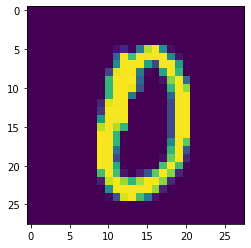

In [6]:
import matplotlib.pyplot as plt
img_test = (test_x[55]*255).astype('uint8')[:, :, 0]
plt.imshow(img_test)
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
encoder_model = Sequential([input_layer, encoder_layer], name='encoder')
encoder_model.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 16)                69392     
Total params: 69,392
Trainable params: 69,200
Non-trainable params: 192
_________________________________________________________________


In [5]:
import numpy as np
img_test = np.expand_dims(test_x[55], axis=0)
print(img_test.shape)
img_test_encoded = encoder_model.predict(img_test)
print(img_test_encoded.shape)
print(img_test_encoded)

(1, 28, 28, 1)
(1, 16)
[[ 33.567905  -15.614704    1.317092   23.65686    38.408558   49.376408
  -20.864748  -12.994627    1.9732866 -23.61759    -5.117126   27.520245
  -22.01906     0.5546897 -37.720867   34.81204  ]]


In [9]:
decoded_img = decoder_layer(img_test_encoded)
print(decoded_img.shape)

(1, 28, 28, 1)


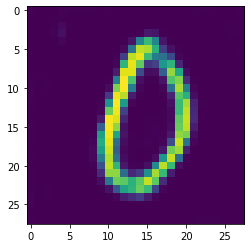

In [10]:
decoded_img = (decoded_img.numpy()*255).astype('uint8')[0][:, :, 0]
plt.imshow(decoded_img)
plt.show()

In [11]:
og_img = test_x[55][:, :, 0]
print(f'original image size : {og_img.shape}\n')
print(f'encoded image size : {img_test_encoded.shape}\n')
print(f'compressed rate {100 - 100*len(img_test_encoded.reshape((1, -1))[0])/len(og_img.reshape((1, -1))[0])}')

original image size : (28, 28)

encoded image size : (1, 16)

compressed rate 97.95918367346938


In [12]:
encoder_model.save('saved_models/encoder')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models/encoder\assets


In [13]:
decoder_layer.save('saved_models/decoder')

INFO:tensorflow:Assets written to: saved_models/decoder\assets


In [6]:
decoder_model = tf.keras.models.load_model('saved_models/decoder')
print(decoder_model(img_test_encoded).shape)
print(decoder_model(img_test_encoded))

(1, 28, 28, 1)
tf.Tensor(
[[[[5.06276684e-03]
   [1.09062204e-03]
   [2.96677416e-03]
   [3.86144849e-03]
   [9.89171118e-03]
   [4.38755564e-03]
   [5.77415247e-03]
   [4.44841944e-03]
   [5.20836003e-03]
   [2.60368804e-03]
   [6.28980156e-03]
   [2.17765640e-03]
   [7.33437249e-04]
   [3.44777742e-04]
   [1.00240589e-03]
   [9.01668274e-04]
   [9.52299684e-04]
   [5.60653105e-04]
   [2.30558589e-03]
   [2.61669769e-03]
   [2.04024091e-03]
   [1.79116835e-03]
   [4.72913217e-03]
   [4.35112556e-03]
   [2.34888541e-03]
   [1.95350428e-03]
   [2.14568293e-03]
   [7.35143339e-03]]

  [[2.57947948e-03]
   [2.66037212e-04]
   [7.08001840e-04]
   [1.06631743e-03]
   [5.22243651e-03]
   [1.70593779e-03]
   [1.37098448e-03]
   [9.41963342e-04]
   [9.42336337e-04]
   [2.99803214e-04]
   [4.47776198e-04]
   [1.19856595e-04]
   [4.67224054e-05]
   [2.01612402e-05]
   [8.51968798e-05]
   [1.35118084e-04]
   [1.72265602e-04]
   [7.50991676e-05]
   [2.05724937e-04]
   [1.86977137e-04]
   [2.393096